In [2]:
from turtle import title
from h5py import File
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
#Opening the HDF5 File
input_file = "../output_latest.h5"
data = File(input_file, 'r')
idata = File("../user.viruelas.27383479._000001.output.h5", 'r')

In [4]:
#Accessing the 'Jets' Dataset
print("List of available datasets: " + str(list(idata.keys())))
print("List of available datasets: " + str(list(idata.keys())))
jets = idata['jets']

List of available datasets: ['fs_tracks', 'fs_tracks_simple_ip', 'jets', 'tracks']
List of available datasets: ['fs_tracks', 'fs_tracks_simple_ip', 'jets', 'tracks']


In [8]:
#Printing the 'jets' Attributes
print("The shape of the dataset (jets): " + str(jets.shape))
print("The size of the dataset (jets): " + str(jets.size))
print("The number of dimensions of the dataset (jets): " + str(jets.ndim))
print("The attributes of each element of the dataset (jets): " + str(jets.dtype.fields.keys()))
print("The total number of bytes required to load the full dataset into RAM of the dataset (jets): " + str(jets.nbytes))

The shape of the dataset (jets): (58367,)
The size of the dataset (jets): 58367
The number of dimensions of the dataset (jets): 1
The attributes of each element of the dataset (jets): dict_keys(['pt', 'HadronConeExclTruthLabelPt', 'eta', 'fastDips_pb', 'fastDips_pc', 'fastDips_pu', 'dipz_z', 'dipz_negLogSigma2', 'HadronConeExclTruthLabelID', 'HadronConeExclExtendedTruthLabelID', 'jetPtRank', 'n_super_tracks', 'n_super_tracks_associated', 'n_super_tracks_fixed_cone', 'mcEventWeight', 'eventNumber', 'averageInteractionsPerCrossing', 'actualInteractionsPerCrossing', 'nPrimaryVertices', 'primaryVertexDetectorZ', 'primaryVertexDetectorZUncertainty'])
The total number of bytes required to load the full dataset into RAM of the dataset (jets): 5136296


In [6]:
# Same for different Tracks datasets
tracks = data['super_tracks']
print("The shape of the dataset (tracks): " + str(tracks.shape))
print("The attributes of each element of the dataset (tracks): " + str(tracks.dtype.fields.keys()))
fs_tracks = data['fs_tracks']
#print("The shape of the dataset (fs_tracks): " + str(fs_tracks.shape))
#print("The attributes of each element of the dataset (fs_tracks): " + str(fs_tracks.dtype.fields.keys()))
fs_tracks_simple_ip = data['fs_tracks_simple_ip']
#print("The shape of the dataset (fs_tracks_simple_ip): " + str(fs_tracks_simple_ip.shape))
#print("The attributes of each element of the dataset (fs_tracks_simple_ip): " + str(fs_tracks_simple_ip.dtype.fields.keys()))

The shape of the dataset (tracks): (58367, 40)
The attributes of each element of the dataset (tracks): dict_keys(['numberOfInnermostPixelLayerHits', 'numberOfNextToInnermostPixelLayerHits', 'numberOfPixelHits', 'numberOfSCTHits', 'numberOfPixelHoles', 'numberOfSCTHoles', 'chiSquared', 'numberDoF', 'radiusOfFirstHit', 'qOverP', 'pt', 'qOverPUncertainty', 'd0', 'd0Uncertainty', 'IP2D_signed_d0', 'phiUncertainty', 'thetaUncertainty', 'deta', 'dphi', 'dr', 'ptfrac', 'z0RelativeToBeamspot', 'z0RelativeToBeamspotUncertainty', 'valid'])


KeyError: "Unable to open object (object 'fs_tracks' doesn't exist)"

In [56]:
#Printing the track information for just the first jet in the dataset

first = jets[0]     #First index is ZERO
print("The number of tracks of the first jet in the (jets) dataset is: " + str(first['n_tracks']))
print("The number of fs_tracks of the first jet in the (jets) dataset is: " + str(first['n_fs_tracks']))
print("The number of fs_tracks_simple_ip of the first jet in the (jets) dataset is: " + str(first['n_fs_tracks_simple_ip']))


The number of tracks of the first jet in the (jets) dataset is: 7
The number of fs_tracks of the first jet in the (jets) dataset is: 18
The number of fs_tracks_simple_ip of the first jet in the (jets) dataset is: 18


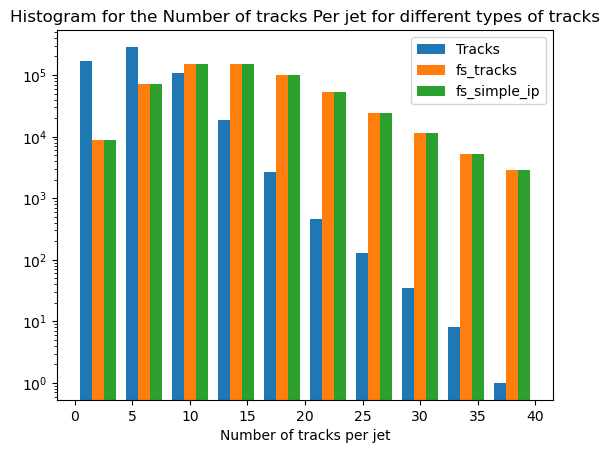

In [8]:
"""Making histograms for the number of tracks, fs_tracks, and fs_tracks_simple_ip of all 
the jets""" 

plt.hist([jets['n_tracks'],jets['n_fs_tracks'],jets['n_fs_tracks_simple_ip']], 
         range=[0,40], label=['Tracks','fs_tracks','fs_simple_ip'])
plt.yscale("log")
plt.legend(loc='upper right')
plt.xlabel("Number of tracks per jet")
plt.title('Histogram for the Number of tracks Per jet for different types of tracks')
plt.savefig('Number of Tracks Per Jet.png')
plt.show()

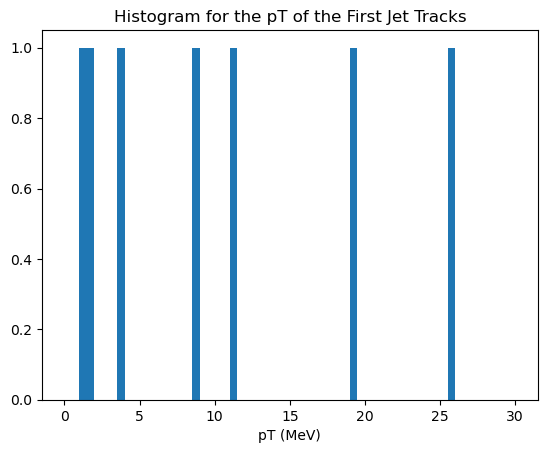

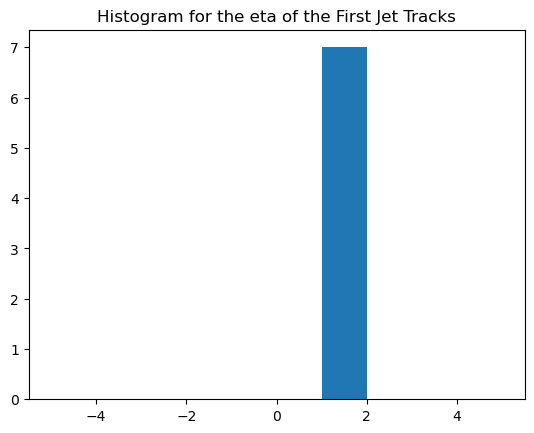

In [12]:
#Making a histogram of, e.g., the track pt & track eta for the tracks in the first jet.

first_jet_valid_pts = tracks[0][tracks[0]['valid']]['pt']
plt.hist(first_jet_valid_pts/1000., range=[0,30], bins= 60)
plt.title('Histogram for the pT of the First Jet Tracks')
plt.xlabel("pT (MeV)")
plt.savefig('FirstJetTracks_pt.png')
plt.show()
first_jet_valid_etas = tracks[0][tracks[0]['valid']]['eta']
plt.hist(first_jet_valid_etas, bins=10, range=[-5,5])
plt.title('Histogram for the eta of the First Jet Tracks')
#plt.savefig('FirstJetTracks_eta.png')
plt.show()


In [59]:
#Making histograms for all the tracks variables

hist_names = ['chiSquared', 'numberDoF', 'IP3D_signed_d0', 'IP2D_signed_d0', 'IP3D_signed_z0',
              'phi', 'theta', 'qOverP', 'numberOfInnermostPixelLayerHits', 
              'numberOfNextToInnermostPixelLayerHits', 'numberOfInnermostPixelLayerSharedHits',
              'numberOfInnermostPixelLayerSplitHits', 'numberOfPixelHits', 'numberOfPixelHoles'
              , 'numberOfPixelSharedHits', 'numberOfPixelSplitHits', 'numberOfSCTHits', 
              'numberOfSCTHoles', 'numberOfSCTSharedHits', 'd0', 'z0SinTheta', 
              'IP3D_signed_d0_significance', 'IP3D_signed_z0_significance', 'pt', 'eta', 
              'd0Uncertainty', 'z0SinThetaUncertainty', 'z0RelativeToBeamspot', 
              'z0RelativeToBeamspotUncertainty', 'deta', 'dphi', 'dr', 'ptfrac', 'valid']

'''
fig, ax = plt.subplots(nrows=math.ceil(len(hist_names) / 4, ncols=4)
for name hist_names: 
    var_tracks = tracks[name].flatten()
    var_fs_tracks = fs_tracks[name].flatten()
    var_fs_tracks_simple_ip = fs_tracks_simple_ip[name].flatten()
    plt.hist([var_tracks,var_fs_tracks,var_fs_tracks_simple_ip], label=['Tracks','fs_Tracks','fs_Simple_IP'])
    plt.legend(loc='upper right')
    plt.title('Histogram for the '+ name +' of all Tracks for different types of tracks')
    plt.savefig(name +' of All Tracks.png')
    plt.cla()
'''

"\nfig, ax = plt.subplots(nrows=math.ceil(len(hist_names) / 4, ncols=4)\nfor name hist_names: \n    var_tracks = tracks[name].flatten()\n    var_fs_tracks = fs_tracks[name].flatten()\n    var_fs_tracks_simple_ip = fs_tracks_simple_ip[name].flatten()\n    plt.hist([var_tracks,var_fs_tracks,var_fs_tracks_simple_ip], label=['Tracks','fs_Tracks','fs_Simple_IP'])\n    plt.legend(loc='upper right')\n    plt.title('Histogram for the '+ name +' of all Tracks for different types of tracks')\n    plt.savefig(name +' of All Tracks.png')\n    plt.cla()\n"

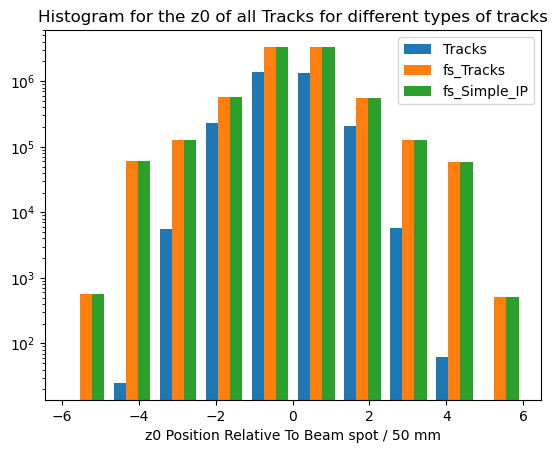

In [19]:
#For adjusting the cosmetics of each attribute of the tracks

var_tracks = tracks['z0RelativeToBeamspot'].flatten()
var_fs_tracks = fs_tracks['z0RelativeToBeamspot'].flatten()
var_fs_tracks_simple_ip = fs_tracks_simple_ip['z0RelativeToBeamspot'].flatten()
plt.hist([var_tracks / 50, var_fs_tracks/ 50, var_fs_tracks_simple_ip/50], 
         label=['Tracks','fs_Tracks','fs_Simple_IP'])
plt.yscale("log")
plt.legend(loc='upper right')
plt.xlabel("z0 Position Relative To Beam spot / 50 mm")
plt.title('Histogram for the '+ 'z0' 
          +' of all Tracks for different types of tracks')
plt.savefig('z0RelativeToBeamspot' +' of All Tracks.png')
plt.show()

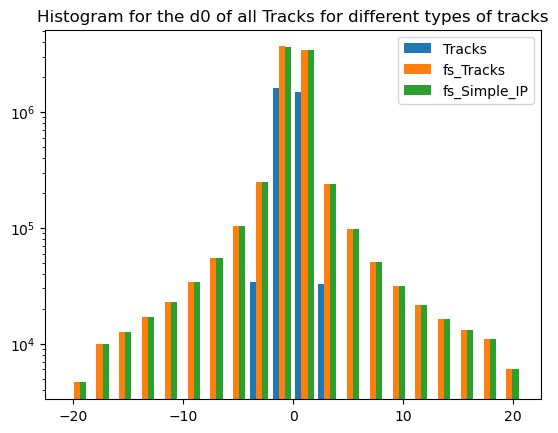

The d0 histogram is symmetric about zero


In [82]:
#Plotting the d0 histogram

var_tracks = tracks['d0'].flatten()
var_fs_tracks = fs_tracks['d0'].flatten()
var_fs_tracks_simple_ip = fs_tracks_simple_ip['d0'].flatten()
plt.hist([var_tracks,var_fs_tracks,var_fs_tracks_simple_ip], label=['Tracks','fs_Tracks','fs_Simple_IP'], bins=20)
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Histogram for the '+ 'd0' +' of all Tracks for different types of tracks')
#plt.savefig('d0Uncertainty' +' of All Tracks.png')
plt.show()


# An algorithm that knows if the d0 histograms is symmetric about zero of not
var_tracks = tracks['d0'].flatten()
above = var_tracks > 0
above = above.astype(int)
below = var_tracks < 0
below = below.astype(int)
if np.sum(above) == np.sum(below) or ((np.sum(above)-np.sum(below)) / len(var_tracks)* 100) < 0.1: 
    print("The " + "d0" + " histogram is symmetric about zero")
else:
    print("The " + "d0" + " histogram is NOT symmetric about zero")